In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Imports for interactive visualizations
import cufflinks as cf
# from IPython.display import display, HTML


In [25]:
df_raw = pd.read_csv('population_total.csv')
df_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [26]:
df_raw.dropna(inplace=True)
df_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [27]:
df_pivot = df_raw.pivot(
    index='year',
    columns='country',
    values='population'
)

In [28]:
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [29]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# Line plot static

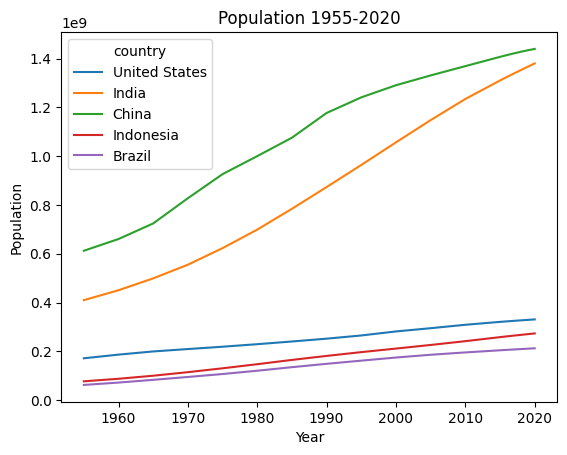

In [30]:
df_pivot.plot(
    kind='line',
    xlabel="Year",
    ylabel="Population",
    title="Population 1955-2020",
)

#save the plot
plt.savefig('my_test.png')
# show the plot
plt.show()

In [ ]:
# Export to xlsx
df_pivot.to_excel('pivot_table.xlsx')

# Line plot interactive

In [49]:
cf.set_config_file(sharing='public', theme='pearl', offline=True)
df_pivot.iplot(
    kind='line',
    xTitle='Years',
    yTitle='Population',
    title='Population 1955-2020'
)

In [32]:
# to view the themes options
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

# Bar plot static

In [34]:
# Pivot with one year only
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [35]:
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population only 2020'}, xlabel='Year', ylabel='Population'>

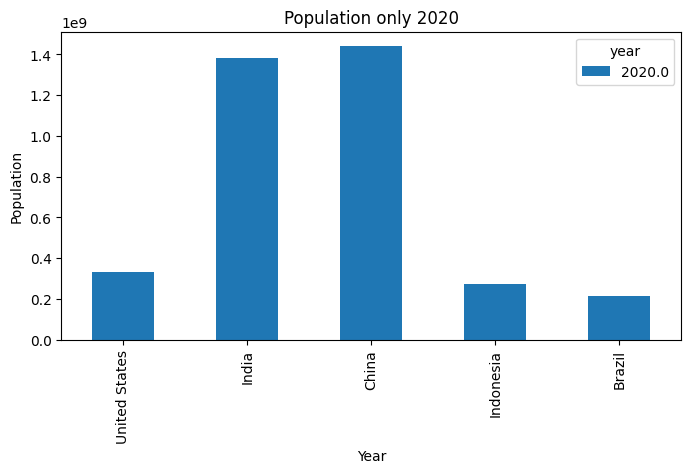

In [36]:
df_pivot_2020.plot(
    kind='bar',
    xlabel="Year",
    ylabel="Population",
    title="Population only 2020",
    figsize=(8, 4)

)

In [37]:
# Pivot with many years

df_pivot_many_years = df_pivot[df_pivot.index.isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Years', ylabel='Population'>

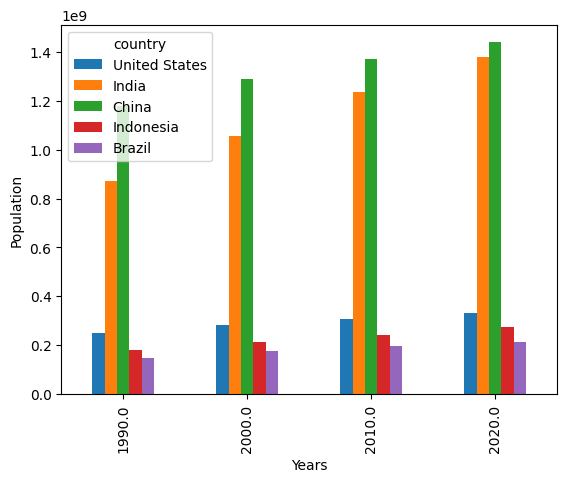

In [38]:
df_pivot_many_years.plot(
    kind='bar',
    xlabel="Years",
    ylabel="Population"
)

# Bar plot interactive

In [53]:
# Pivot with one year only
df_pivot_2020.iplot(
    kind='bar',
    xTitle="Years",
    yTitle="Population"
)

In [55]:
# Pivot with many years
df_pivot_many_years.iplot(
    kind='bar',
    xTitle="Years",
    yTitle="Population"
)

# Piechart static

In [39]:
# Change the columns name from int to str
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


In [40]:
# Change the columns name from int to str
df_pivot_2020.rename(columns={2020: '2020'}, inplace=True)

<Axes: ylabel='2020'>

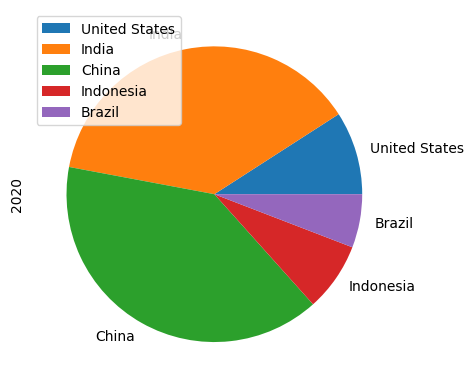

In [61]:
# Making a pie plot
df_pivot_2020.plot(
    kind='pie',
    y='2020'
)

# Pie chart interactive

In [64]:
df_pivot_2020 = df_pivot_2020.reset_index()

In [65]:
df_pivot_2020.iplot(
    kind='pie',
    values='2020',
    labels='country'
)

# Boxplot static

<Axes: ylabel='Population'>

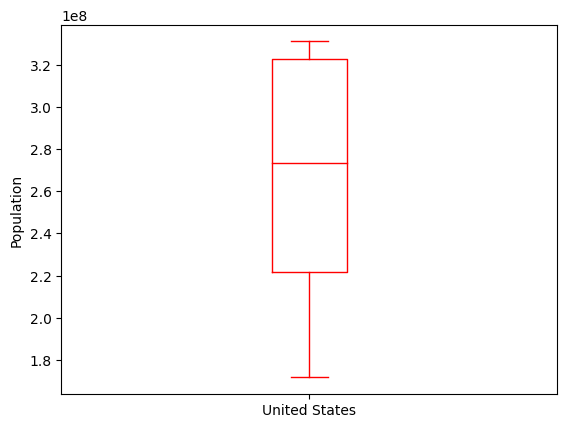

In [42]:
# Single boxplot
df_pivot['United States'].plot(
    kind='box',
    ylabel='Population',
    color='red'
)

<Axes: ylabel='Population'>

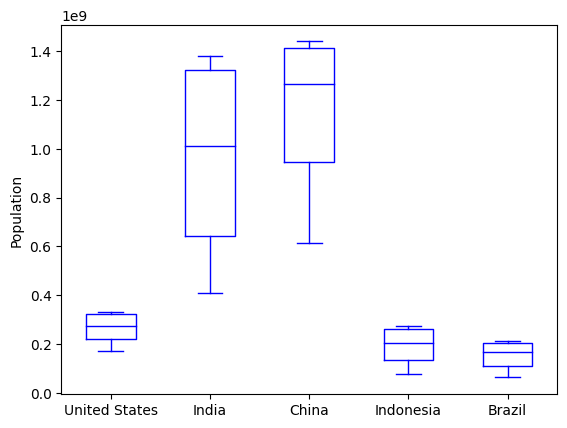

In [66]:
# Multiple boxplot
df_pivot.plot(
    kind='box',
    ylabel='Population',
    color='blue'
)

# Box plot interactive

In [77]:
# Single boxplot
df_pivot['United States'].iplot(
    kind='box',
    yTitle='Population',
    color='purple'
)

In [80]:
# Multiple boxplot interactive
df_pivot.iplot(
    kind='box',
    yTitle='Population'
)

# Histogram static

<Axes: ylabel='Frequency'>

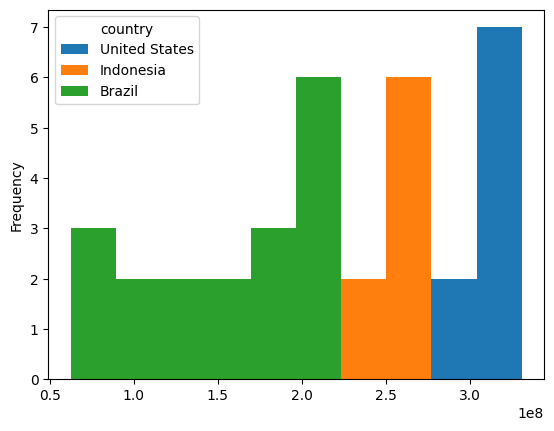

In [44]:
df_pivot[['United States', 'Indonesia', 'Brazil']].plot(kind='hist')

# Histogram interactive

In [85]:
df_pivot[['United States', 'Brazil']].iplot(
    kind='hist',
    # bins = 3
)

# Scatter plot static

In [45]:
df_sample = df_raw[df_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

<Axes: xlabel='year', ylabel='population'>

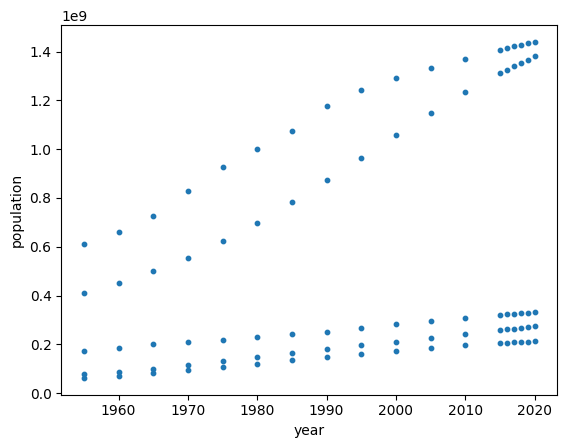

In [46]:
df_sample.plot(
    kind='scatter',
    x='year',
    y='population',
    s=10
)

# Scatter plot interactive

In [89]:
df_pivot.iplot(
    kind='scatter',
    mode='markers',
)